In [110]:
# Load all packages
import torch
import torchvision
import torchvision.transforms as transforms
import os
import numpy as np
     
from torchvision.io import read_image
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import matplotlib
from torch import nn
import neptune.new as neptune
import random

In [140]:

#Create the data loader. This data
class DataLoader():
    def __init__(self, img_dir, img_dir2, transform = None, target_transform=None, transforms = None,
                 random_perspective = None):
        self.img_dir = img_dir
        self.img_dir2 = img_dir2
        self.transform = transform
        self.transforms = transforms
        self.fileNames = os.listdir(img_dir)
        self.random_perspective = random_perspective
    def __len__(self):
        return len(os.listdir(self.img_dir))

    def __getitem__(self, idx):
        label = self.fileNames[idx].rsplit("t-mask-", 1 )[1]
        img_path = os.path.join(self.img_dir, self.fileNames[idx])
        img_path2 = os.path.join(self.img_dir2, label)
        image = read_image(img_path)
        target_image = read_image(img_path2)
        image = image.clone().detach().float()
        target_image = target_image.clone().detach().float()
        if self.transforms:
            image = self.transforms(image)
            target_image = self.transforms(target_image)
        if self.random_perspective:
            if random.uniform(0,1) > 0.5:
                scale = random.uniform(0,0.3)
                startpoints, endpoints = transforms.RandomPerspective().get_params(50,50, distortion_scale=scale)
                image = torchvision.transforms.functional.perspective(image, startpoints, endpoints)
                target_image  = torchvision.transforms.functional.perspective(target_image, startpoints, endpoints)
        return image, target_image

TypeError: 'module' object is not callable

In [154]:
#Choose batch_size:
batch_size = 1

#create transformer with mean = 0 and std = 1.
transformer= transforms.Compose([transforms.Normalize((0, 0, 0), (1, 1, 1))])

#Create the dataset with the dataloader:
dataset = DataLoader("Data_small/50_with_mask", "Data_small/50_without_mask",
                     transforms = transformer,
                     random_perspective = True) 

# split the dataset into test and train set.
test_size = int(0.999 * len(dataset))
train_size = len(dataset) - test_size
test_train_split = [test_size, train_size]
testdata, traindata = torch.utils.data.random_split(dataset = dataset, lengths = test_train_split)

# Set up dataloader and the test
trainloader = torch.utils.data.DataLoader(traindata, 
                                          batch_size=1, 
                                          shuffle=True, 
                                          num_workers=0)
dataiter = iter(trainloader)

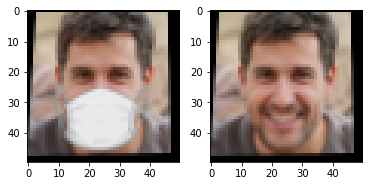

In [159]:
image, image2 = dataiter.next()
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(np.transpose(image[0].numpy(), (1, 2, 0)).astype('uint8'))
ax2.imshow(np.transpose(image2[0].numpy(), (1, 2, 0)).astype('uint8'))
plt.show()

In [ ]:
test = dict(foo=image, bar=image2)

In [37]:
transform = transforms.Compose(
    transforms.Resize(256)
)

# this would normally come from a dataset, i.e. `for sample in datasets.load("coco")`
sample = dict(foo=image, bar=image2)
transformed_sample = transform(sample)

show(transformed_sample["foo"], transformed_sample["bar"])

TypeError: 'Resize' object is not iterable

In [39]:
transforms.RandomPerspective(distortion_scale=0.9, p=1).get_params()

TypeError: get_params() missing 3 required positional arguments: 'width', 'height', and 'distortion_scale'

In [8]:
import inspect
class foo:
      def bar():
            print("Hello")
print(inspect.getsource(foo.bar))

      def bar():
            print("Hello")



In [4]:
import inspect
  
def far(n):
    factorial = 1
    if int(n) >= 1:
        for i in range (1, int(n)+1):
            factorial = factorial * i
    return factorial
  
source = inspect.getsource(far)
print(source)

def far(n):
    factorial = 1
    if int(n) >= 1:
        for i in range (1, int(n)+1):
            factorial = factorial * i
    return factorial

